In [21]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [23]:
from keras.datasets import mnist

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
len(x_train)  #return the length of an array

60000

In [26]:
len(y_train)

60000

In [27]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
x_train[9487].shape  #size of the matrix

(28, 28)

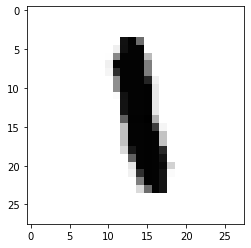

In [29]:
plt.imshow(x_train[9487], cmap='Greys')

In [30]:
print(y_train[9487])

1


In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [33]:
from keras.utils import np_utils

In [34]:
y_train = np_utils.to_categorical(y_train, 10) #one hot encoding

In [35]:
y_test = np_utils.to_categorical(y_test, 10)

In [36]:
print(y_train[9487])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
#setting up

In [38]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.optimizers import SGD


In [39]:
model = Sequential()

In [40]:
model.add(Dense(500, input_dim = 784))  #Add the first hidden layer
model.add(Activation('sigmoid'))

In [41]:
model.add(Dense(500))  #Add the second hid. layer
model.add(Activation('sigmoid'))

In [42]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [43]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.1), metrics=['accuracy']) 
#mse = square
#lr = learning rate

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [45]:
# 392500  hid. layer 1
# 784(input) * 500(neural) + 500(bias)
784*500+500

392500

In [46]:
# 250500 hid. layer 2
# 500(neural, input of hid. 1) * 500(neural) + 500(bias)

In [47]:
# 5010 output lauyer
# 500(neural, input of hid. 2) * 10(neural) + 10(bias)

In [48]:
#training

In [58]:
model.fit(x_train, y_train, batch_size = 100, epochs = 30)

Epoch 1/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0091 - accuracy: 0.9471
Epoch 2/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0089 - accuracy: 0.9483
Epoch 3/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0086 - accuracy: 0.9499
Epoch 4/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0084 - accuracy: 0.9517
Epoch 5/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0081 - accuracy: 0.9532
Epoch 6/30
60000/60000 [==============================] - 8s 128us/step - loss: 0.0079 - accuracy: 0.9544
Epoch 7/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0077 - accuracy: 0.9558
Epoch 8/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.0075 - accuracy: 0.9567
Epoch 9/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.0074 - accuracy: 0.9579
Epoch 10/30
60000/60000 [=====================

In [50]:
from ipywidgets import interact_manual

In [52]:
predict = model.predict_classes(x_test)

In [54]:
def test(num_test) :
    plt.imshow(x_test[num_test].reshape(28, 28), cmap = 'Greys')
    print('Result is : ', predict[num_test])

In [57]:
interact_manual(test, num_test = (0, 9999))

interactive(children=(IntSlider(value=4999, description='num_test', max=9999), Button(description='Run Interac…

<function __main__.test(num_test)>